In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
ecom = pd.read_csv('/content/4_ecom_v1.csv')
df = ecom.copy()

In [48]:
df.sample(5)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
721,0,8.0,Phone,1,8.0,Debit Card,Male,2.0,4,Fashion,4,Married,3,0,18.0,6.0,6.0,4.0,202.7400
4592,0,14.0,Phone,1,21.0,Credit Card,Male,3.0,5,Others,3,Single,3,0,15.0,4.0,5.0,10.0,318.7431
2912,1,9.0,Computer,3,33.0,Debit Card,Female,4.0,4,Laptop & Accessory,5,Divorced,4,0,15.0,1.0,2.0,1.0,167.8600
3813,0,5.0,Computer,1,17.0,Credit Card,Female,3.0,4,Fashion,3,Married,6,0,21.0,4.0,2.0,9.0,235.3100
899,0,20.0,Phone,1,8.0,Credit Card,Female,2.0,3,Grocery,3,Divorced,4,0,19.0,1.0,5.0,6.0,271.6900


## Encoding Categorical data

In [49]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

PreferredLoginDevice: ['Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'Credit Card' 'COD' 'E wallet']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']


In [50]:
# for now we will do label encoding as we want to know feature importance
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])
    print(f"{col}: {df[col].unique()}")


PreferredLoginDevice: [1 0]
PreferredPaymentMode: [2 4 1 0 3]
Gender: [0 1]
PreferedOrderCat: [2 4 3 0 1]
MaritalStatus: [2 0 1]


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5058 entries, 0 to 5057
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5058 non-null   int64  
 1   Tenure                       5058 non-null   float64
 2   PreferredLoginDevice         5058 non-null   int64  
 3   CityTier                     5058 non-null   int64  
 4   WarehouseToHome              5058 non-null   float64
 5   PreferredPaymentMode         5058 non-null   int64  
 6   Gender                       5058 non-null   int64  
 7   HourSpendOnApp               5058 non-null   float64
 8   NumberOfDeviceRegistered     5058 non-null   int64  
 9   PreferedOrderCat             5058 non-null   int64  
 10  SatisfactionScore            5058 non-null   int64  
 11  MaritalStatus                5058 non-null   int64  
 12  NumberOfAddress              5058 non-null   int64  
 13  Complain          

## 1.Correlation analysis

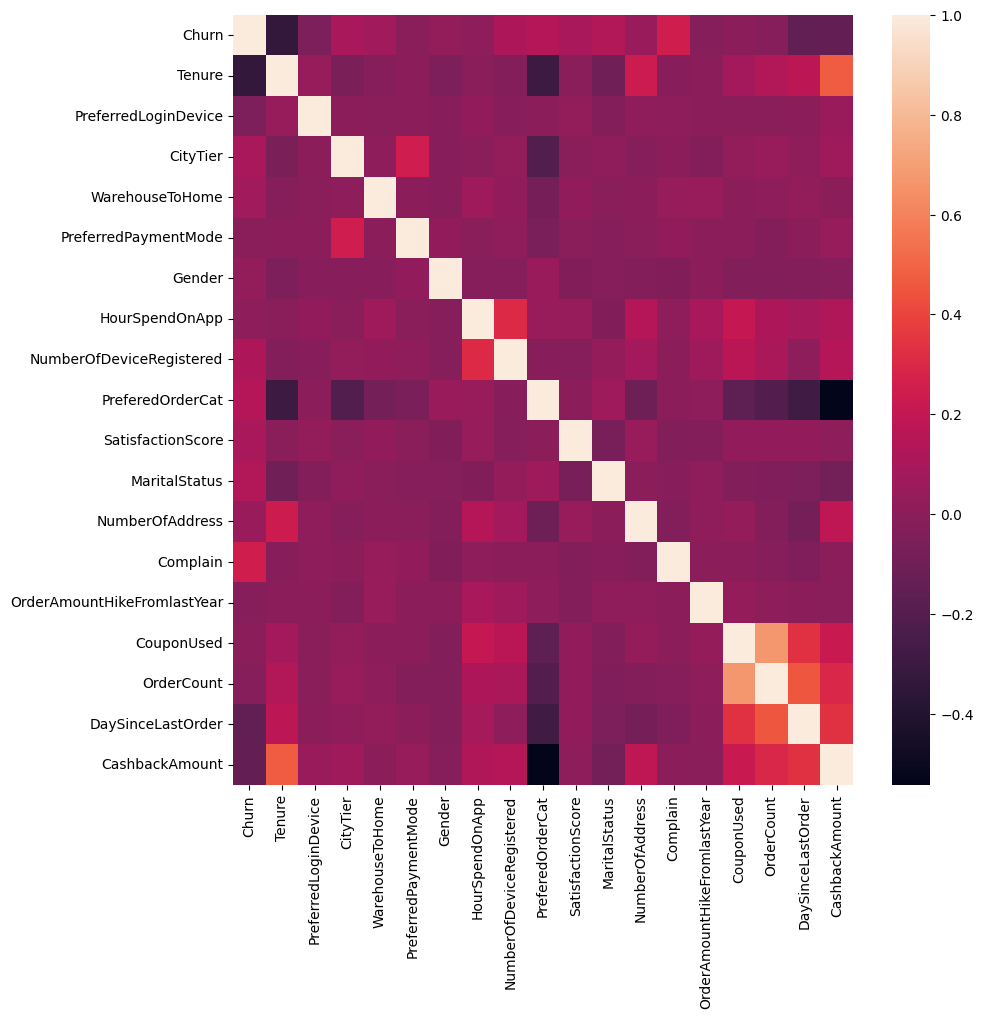

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

In [53]:
fi_1 = df.corr()['Churn'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','Churn':'corr_coeff'})
fi_1['corr_coeff'] = np.abs(fi_1['corr_coeff'] / np.sum(np.abs(fi_1['corr_coeff'])))
fi_1

,feature,corr_coeff
0,Tenure,0.190643
1,PreferredLoginDevice,0.029528
2,CityTier,0.056349
3,WarehouseToHome,0.042518
4,PreferredPaymentMode,0.004566
5,Gender,0.015787
6,HourSpendOnApp,0.006170
7,NumberOfDeviceRegistered,0.066915
8,PreferedOrderCat,0.083662
9,SatisfactionScore,0.057321


## 2.Random Forest Feature Importance

In [54]:
from sklearn.ensemble import RandomForestClassifier
X = df.drop('Churn',axis=1)
y = df['Churn']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

fi_2 = pd.DataFrame({
    'feature': X.columns,
    'rf_importance': rf.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_2

,feature,rf_importance
0,Tenure,0.229267
17,CashbackAmount,0.100017
3,WarehouseToHome,0.078889
11,NumberOfAddress,0.068127
16,DaySinceLastOrder,0.064700
12,Complain,0.063386
13,OrderAmountHikeFromlastYear,0.057790
9,SatisfactionScore,0.047662
4,PreferredPaymentMode,0.042045
8,PreferedOrderCat,0.036651


## 3.Gradient Boosting Feature importances

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X, y)

fi_3 = pd.DataFrame({
    'feature': X.columns,
    'gb_importance': gb.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_3

,feature,gb_importance
0,Tenure,0.449480
12,Complain,0.127360
11,NumberOfAddress,0.084717
17,CashbackAmount,0.064531
16,DaySinceLastOrder,0.047450
9,SatisfactionScore,0.036895
10,MaritalStatus,0.032784
8,PreferedOrderCat,0.032670
3,WarehouseToHome,0.030399
7,NumberOfDeviceRegistered,0.028722


## 4.Permutation Importance

In [56]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_perm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_perm.fit(X_train, y_train)

result = permutation_importance(rf_perm, X_test, y_test, n_repeats=30, random_state=42)

fi_4 = pd.DataFrame({
    'feature': X.columns,
    'perm_importance': result.importances_mean
}).sort_values(by='perm_importance', ascending=False)

fi_4

,feature,perm_importance
0,Tenure,0.138999
12,Complain,0.050165
11,NumberOfAddress,0.034651
8,PreferedOrderCat,0.028063
17,CashbackAmount,0.027536
3,WarehouseToHome,0.025988
16,DaySinceLastOrder,0.024539
10,MaritalStatus,0.022563
2,CityTier,0.022530
9,SatisfactionScore,0.020652


## 5.RFE

In [57]:
from sklearn.feature_selection import RFE

estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=X.shape[1], step=1)
selector = selector.fit(X, y)

fi_5 = pd.DataFrame({
    'feature': X.columns,
    'rfe_importance': selector.estimator_.feature_importances_
}).sort_values(by='rfe_importance', ascending=False)

fi_5

,feature,rfe_importance
0,Tenure,0.224381
17,CashbackAmount,0.102104
3,WarehouseToHome,0.077430
11,NumberOfAddress,0.068098
16,DaySinceLastOrder,0.063006
12,Complain,0.062079
13,OrderAmountHikeFromlastYear,0.057910
9,SatisfactionScore,0.049756
4,PreferredPaymentMode,0.043713
7,NumberOfDeviceRegistered,0.039382


## 6.Logistic Regression Weights

In [58]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)

lr.coef_[0] = np.abs(lr.coef_[0] / np.sum(np.abs(lr.coef_[0])))
fi_6 = pd.DataFrame({
    'feature': X.columns,
    'lr_coef': lr.coef_[0]
}).sort_values(by='lr_coef', ascending=False)
fi_6


,feature,lr_coef
12,Complain,0.236007
10,MaritalStatus,0.109535
7,NumberOfDeviceRegistered,0.089600
2,CityTier,0.087310
9,SatisfactionScore,0.078396
1,PreferredLoginDevice,0.065220
6,HourSpendOnApp,0.060991
15,OrderCount,0.049657
0,Tenure,0.044477
11,NumberOfAddress,0.041688


## 7.SHAP

In [59]:
import shap
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

In [60]:
shap_values.shape

(5058, 18, 2)

In [61]:
fi_7 = pd.DataFrame({
    'feature': X.columns,
    'shap_importance': np.abs(shap_values[:,:,1]).mean(axis=0)
}).sort_values(by='shap_importance', ascending=False)

fi_7

,feature,shap_importance
0,Tenure,0.118346
12,Complain,0.054957
11,NumberOfAddress,0.027835
8,PreferedOrderCat,0.026398
10,MaritalStatus,0.025820
16,DaySinceLastOrder,0.024579
17,CashbackAmount,0.022608
2,CityTier,0.019441
9,SatisfactionScore,0.017742
3,WarehouseToHome,0.017313


## Overall Feature Importance

In [62]:
fi = fi_1.merge(fi_2,on='feature').merge(fi_3,on='feature').merge(fi_4,on='feature').merge(fi_5,on='feature').merge(fi_6,on='feature').merge(fi_7,on='feature').set_index('feature')

In [63]:
fi

,corr_coeff,rf_importance,gb_importance,perm_importance,rfe_importance,lr_coef,shap_importance
feature,,,,,,,
Tenure,0.190643,0.229267,0.449480,0.138999,0.224381,0.044477,0.118346
PreferredLoginDevice,0.029528,0.019354,0.007488,0.006621,0.020923,0.065220,0.008651
CityTier,0.056349,0.026619,0.017379,0.022530,0.025865,0.087310,0.019441
WarehouseToHome,0.042518,0.078889,0.030399,0.025988,0.077430,0.005558,0.017313
PreferredPaymentMode,0.004566,0.042045,0.010312,0.014954,0.043713,0.020105,0.010226
Gender,0.015787,0.017904,0.001645,0.009519,0.017834,0.004701,0.003908
HourSpendOnApp,0.006170,0.021329,0.003797,0.003821,0.021542,0.060991,0.003558
NumberOfDeviceRegistered,0.066915,0.036198,0.028722,0.014592,0.039382,0.089600,0.012301
PreferedOrderCat,0.083662,0.036651,0.032670,0.028063,0.037180,0.035692,0.026398


In [64]:
fi = fi.divide(fi.sum(axis=0), axis=1)

In [65]:
fi.columns

Index(['corr_coeff', 'rf_importance', 'gb_importance', 'perm_importance',
       'rfe_importance', 'lr_coef', 'shap_importance'],
      dtype='object')

In [66]:
fi[['corr_coeff', 'rf_importance', 'gb_importance', 'perm_importance',
       'rfe_importance', 'lr_coef', 'shap_importance']].mean(axis=1).sort_values(ascending=False)

,0
feature,
Tenure,0.244895
Complain,0.123937
CashbackAmount,0.066881
NumberOfAddress,0.061648
DaySinceLastOrder,0.058653
MaritalStatus,0.057489
SatisfactionScore,0.050856
PreferedOrderCat,0.049731
WarehouseToHome,0.047288


**-> we see that `OrderCount`, `HourspendonApp` , `CouponUsed` ,`Gender` and `PreferredLoginDevice` are least important for classification but we need to cross validate using model**

In [67]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
scores.mean()

np.float64(0.980822806832354)

In [68]:
rf_drop = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf_drop, X.drop(['HourSpendOnApp','CouponUsed','Gender'],axis=1), y, cv=5, scoring='accuracy')
scores.mean()

np.float64(0.982009164017937)

In [69]:
rf_drop = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf_drop, X.drop(['HourSpendOnApp','CouponUsed','Gender','OrderCount'],axis=1), y, cv=5, scoring='accuracy')
scores.mean()

np.float64(0.9826024403498279)

In [70]:
rf_drop = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf_drop, X.drop(['HourSpendOnApp','CouponUsed','Gender','OrderCount','PreferredLoginDevice'],axis=1), y, cv=5, scoring='accuracy')
scores.mean()

np.float64(0.9828004597647224)

In [71]:
rf_drop = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf_drop, X.drop(['HourSpendOnApp','CouponUsed','Gender','PreferredLoginDevice'],axis=1), y, cv=5, scoring='accuracy')
scores.mean()

np.float64(0.9837886020572124)

**finally we will drop `HourspendonApp` , `CouponUsed`,`Gender` and `PreferredLoginDevice` as this gives improved score**

In [76]:
df.drop(['HourSpendOnApp','CouponUsed','Gender','PreferredLoginDevice'],axis=1,inplace=True)

In [77]:
df.to_csv('ecom_labelled_v2.csv',index=False)

In [72]:
ecom.drop(['HourSpendOnApp','CouponUsed','Gender','PreferredLoginDevice'],axis=1,inplace=True)

In [75]:
ecom.to_csv('ecom_v2.csv',index=False)